<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Navarro Silva José Tonatiuh, Muñoz Pablo Humberto, Rodríguez Rodríguez Ana Esmeralda.

**Fecha:** 05 de Julio del 2021

**Expediente** : 722399, 719963 , 709288
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/if722399/Proyecto-SPF

# Proyecto TEMA-2

### 1.1 Título
## Niveles de CO2 emitidos por autos vendidos

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Pronosticar el promedio de los niveles de CO2 en relación con los autos vendidos

> #### 1.2 Objetivos específicos.  
>  - Proyectar el volúmen de ventas dependiendo el tipo de carro.
>  - Simular el comportamiento de las ventas totales.
>  - Estimar el cambio en la cantidad de CO2 a partir de los autos vendidos. 
>  - Analizar de forma gráfica las emisiones de C02 y los autos vendidos.

### 1.3 Definición del problema.
 
Vivimos en una ciudad donde la infraestructura está diseñada para el uso del carro. México es un país que se ha desarrollado en la industria del ensamblaje y producción de automoviles, siendo Estados Unidos uno de nuestros aliados comerciales más importantes, sin embargo existe la oportunidad de encontrar marcas de autos internacionales. Buscamos simular el impacto que tienen las ventas de autos, ya sean eléctricos, híbridos y de diesel en las emisiones de CO2.


Nuestro propósito con este proyecto es analizar la base de datos, obtener las distribuciones de probabilidad de cada variable de interés y asi poder realizar una conclusión acerca de la relación que existe entre las ventas de los 3 tipos de autos y la emisión de CO2.

Se utilizarán las siguientes variables: Promedio de $CO_2$, ventas de vehículos que usan diesel, ventas de vehículos que utilizan gasolina, ventas de vehículos que son híbridos, ventas de vehículos que son eléctricos.




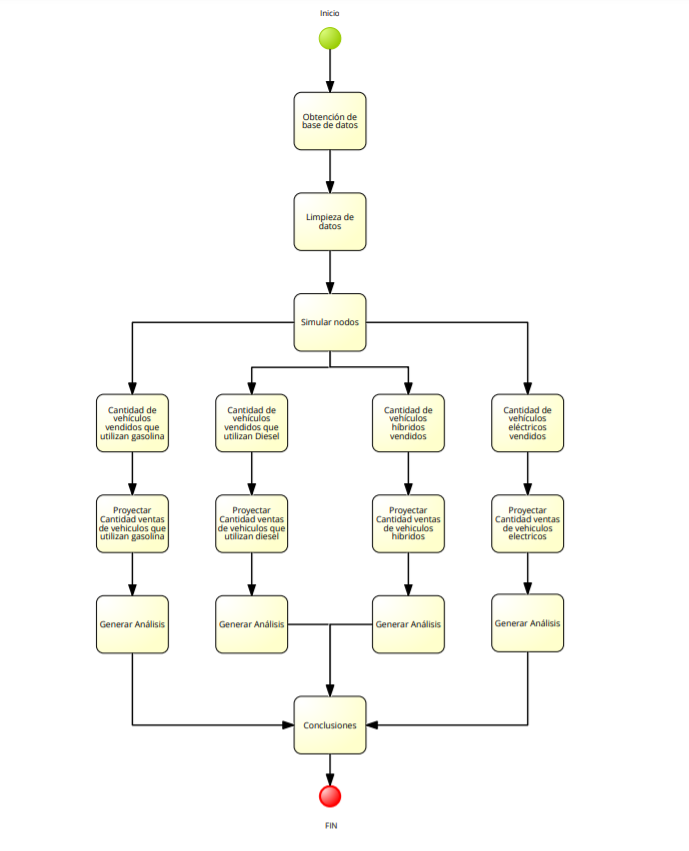

### 1.4 Nodos y variables que se decidieron simular y porqué

Los nodos que se han elegido para este proyecto es: 

>- Total de ventas de autos que usan gasolina
>- Total de ventas de autos que usan diesel.
>- Total de ventas de autos eléctricos.
>- Total de ventas de autos híbridos.

Se simula el volumen de ventas por auto para analizar como afecta el promedio de emisiones .

Al simular la Ventas de autos que usan Diesel podremos analizar los patrones en su venta.

El total de ventas de autos eléctricos nos dejará conocer la relacción en los aumentos de ventas de esta variable y la disminución de ventas de otro tipo de auto.

El total de ventas de autos híbridos permitirá determinar si las emisiones de gas tienen un incremento en la venta de este auto.

Al finalizar la simulación se podrán elegir los autos que presentan una mayor posibilidad de ventas para un inversionista.

### 1.5 Definición de hipótesis y supuestos.


Hipótesis:

- El volúmen de las emisiones de CO2 está altamente correlacionado con las ventas del tipo de auto.
- El vehículo que utilza diesel es el que se vende en mayor cantidad.
- El volúmen de las emisiones de CO2 va incrementando a lo largo del tiempo.


Supuestos: 

- La producción de CO2 g/km por tipo de carro es de
    1. coche mediano promedio que utiliza gasolina: 143 g/km
    2. coche mediano promedio que utiliza diesel: 114 g/km
    3. coche mediano promedio hibrido: 101 g/km
    4. coche mediano promedio eléctrico: 68 g/km
    
    
- Los datos obtenidos son verídicos.
- El total de números de carros que utilizan gasolina se presenta como la diferencia entre total de ventas y las ventas de los 3 tipos de carros.
- Las unidades en las que se presenta la cantidad de CO2 es de g/km (gramos por kilómetro).

### 1.6 Obtención de bases de datos

La base de datos se obtuvo del siguiente enlace: https://www.kaggle.com/dmi3kno/newcarsalesnorway?select=norway_new_car_sales_by_month.csv, la cual se encuentra en el sitio de Kaggle, sitio web diseñado para proporcionar una gran catidad de data sets con propósitos académicos.

### Librerias a utilzar a lo largo del proyecto

In [137]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline

In [138]:
data = pd.read_csv('norway_new_car_sales_by_month.csv')
data.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007-1,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007-2,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007-3,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007-4,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007-5,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


### Limpieza de base de datos

In [139]:
data = data.iloc[:,[0,2,11,14,15]]

data.set_index('Year', inplace=True)
data.fillna(0, inplace = True)
data['Quantity_Bensin'] = data['Quantity']- data['Quantity_Diesel'] - data['Quantity_Hybrid'] - data['Quantity_Electric']

# Supuestos sobre CO2 por tipo de carro
gasolina = 143 
diesel = 114 
hibrido = 101 
electrico = 68 

# Calculamos el promedio de CO2 en base al total de nuestras ventas

data['Avg_CO2'] = np.mean(  data['Quantity_Diesel']*diesel + data['Quantity_Electric']*electrico
                          + data['Quantity_Bensin']*gasolina + data['Quantity_Hybrid']*hibrido)

data['Avg_CO2'] = data['Avg_CO2']/data['Quantity']

### Base de datos limpia

In [140]:
data

,Quantity,Quantity_Diesel,Quantity_Hybrid,Quantity_Electric,Quantity_Bensin,Avg_CO2
Year,,,,,,
2007-1,12685,10072,0.0,0.0,2613.0,103.846225
2007-2,9793,7222,0.0,0.0,2571.0,134.513363
2007-3,11264,7965,0.0,0.0,3299.0,116.946854
2007-4,8854,6116,0.0,0.0,2738.0,148.779011
2007-5,12007,8519,0.0,0.0,3488.0,109.710116
...,...,...,...,...,...,...
2016-9,13854,3838,3991.0,2629.0,3396.0,95.083684
2016-10,11932,3544,3209.0,1861.0,3318.0,110.399712
2016-11,13194,3892,3181.0,2567.0,3554.0,99.840031


### Funciones a utilizar a lo largo del proyecto

In [141]:
def kde_scipy_1(x,bandwidth=1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

In [142]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 b: 'Entero máximo del vector x',
                 n: 'Salto del vector en R2'):
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,b,n)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

In [143]:
def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 

In [144]:
def Gen_distr_discreta_(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

### Nodo 1: Vehiculos vendidos que utilizan gasolina

Para el primer nodo, nuestro propósito es crear un modelo que proyecte las ventas de los vehiculos que producen gasolina. Debido a que nuestra base de datos nos proporciona información de manera mensual, esperamos que nuestro modelo sea capaz de predecir las ventas del mes siguiente (02-2017).

El primer paso a realizar es calcular el kernel density estimation.

In [148]:
v_gasolina = data['Quantity_Bensin']
Vehiculo_g = kde_scipy_1(v_gasolina) #Función


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array(v_gasolina)[:, None])
print(grid.best_params_)

{'bandwidth': 1.0}


Comparamos el histograma de los datos real contra la estimación del kernel


### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> https://www.caranddriver.com/es/coches/planeta-motor/a30780438/emisiones-contaminantes-segun-tipo-coche/



<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>